„Åì„ÅÆ notebook „ÅÆÂÜÖÂÆπ„Çí‰Ωø„Å£„ÅüË¨õÂ∫ß„ÅÆÈÖç‰ø° URL „ÅØ https://youtube.com/live/94dWlMigwYM?feature=share „Åß„Åô

In [2]:
import os
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from contextlib import contextmanager
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil

%matplotlib inline


# ref: Kaggle„Ç≥„Éº„ÉâÈÅ∫Áî£ https://qiita.com/kaggle_grandmaster-arai-san/items/d59b2fb7142ec7e270a5 
class Timer:
    def __init__(self, logger=None, format_str="{:.3f}[s]", prefix=None, suffix=None, sep=" "):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)


def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    
# ÂÜçÁèæÊÄßÁ¢∫‰øù!
seed_everything(510)

In [3]:
from pathlib import Path
# data_dir
DATA_DIR = Path("../data/")

# Â≠¶ÁøíÁî®„ÅÆ„É≠„Ç∞„Éá„Éº„Çø„Å®Ê≠£Ëß£„É©„Éô„É´
train_log_df = pd.read_csv(DATA_DIR / "train_log.csv")
train_label_df = pd.read_csv(DATA_DIR / "train_label.csv")

# ÂÆø„ÅÆ„Éá„Éº„Çø
yado_df = pd.read_csv(DATA_DIR / "yado.csv")

# „ÉÜ„Çπ„ÉàÊúüÈñì„ÅÆ„É≠„Ç∞„Éá„Éº„Çø
test_log_df = pd.read_csv(DATA_DIR / "test_log.csv")

sample_submission_df = pd.read_csv(DATA_DIR / "sample_submission.csv")

# ÁîªÂÉè„ÅÆ„Éá„Éº„Çø
image_df = pd.read_parquet(DATA_DIR / "image_embeddings.parquet")

In [4]:
# „Åô„Åπ„Å¶„ÅÆ„É≠„Ç∞„Éá„Éº„Çø„ÅØ„ÅÇ„Å®„ÅÇ„Å®ÂèÇÁÖß„Çí„Åô„Çã„ÅÆ„ÅßÂÖà„Å´‰Ωú„Å£„Å¶„Åä„Åç„Åæ„Åô.
whole_log_df = pd.concat([train_log_df, test_log_df], ignore_index=True)

## „Çª„ÉÉ„Ç∑„Éß„É≥„Åî„Å®„ÅÆÂÆøÂÄôË£ú„ÅÆ‰ΩúÊàê„ÇíÊ∑±Â†Ä„Åô„Çã

Ë¨õÂ∫ß#1„Åß„ÅØ„É©„É≥„ÉÄ„É†„Å´ÁµÑ„ÅøÂêà„Çè„Åõ„Çí‰Ωú„Å£„Å¶„ÅÑ„Åæ„Åó„Åü„ÄÇ„Åü„Å†„Åì„ÅÆÂÄôË£ú„ÅØ„ÄåÂÄôË£ú„Å´ÁÑ°„ÅÑ„ÇÇ„ÅÆ„ÅØÁµ∂ÂØæ„Å´‰∫àÊÉ≥„Åï„Çå„Å™„ÅÑ„Äç„Åü„ÇÅ„ÄÅ‰∫àÊ∏¨ÊÄßËÉΩ„ÇíËÄÉ„Åà„Çã‰∏ä„ÅßÂ§ßÂ§âÈáçË¶Å„Åß„Åô„ÄÇ

ÂÄôË£ú„ÅÆÈÅ∏„Å≥Êñπ„ÅåÈúÄË¶Å„Å™„ÅÆ„ÅØ„ÄÅ„É´„Éº„É´„Éô„Éº„Çπ„ÅßÊ©üÊ¢∞Â≠¶Áøí„Çí‰Ωø„Çè„Åö„Å®„ÇÇ„ÅÑ„ÅÑÊÑü„Åò„Å´ÂÄôË£ú„Åï„Åà‰Ωú„Å£„Å¶„Åó„Åæ„Åà„Å∞„Åù„Çå„Å™„Çä„ÅÆÊÄßËÉΩ„ÅåÂá∫„Å¶„Åó„Åæ„ÅÜ„Åì„Å®„Åã„Çâ„ÇÇ„Çè„Åã„Çã„Åß„Åó„Çá„ÅÜ„ÄÇ‰æã„Åà„Å∞ @nasuka „Åï„Çì„ÅÆ [Ê©üÊ¢∞Â≠¶Áøí„Çí‰Ωø„Çè„Å™„ÅÑ„Éô„Éº„Çπ„É©„Ç§„É≥(LB: 0.3799)](https://www.guruguru.science/competitions/22/discussions/3ed58bd1-8d35-40e6-8202-db69ac858b3a/) „ÇÑ 
@yutypo „Åï„Çì„ÅÆ [ÊúÄÁµÇÈñ≤Ë¶ß„ÅÆÂÆø„Å´ÂØæ„Åô„Çã‰∫àÁ¥Ñ„Åï„Çå„ÅüÂÆø„ÅÆ‰ª∂Êï∞„ÅÆ‰∏ä‰Ωç„Åã„Çâ‰∫àÊ∏¨ÂÄ§„ÇíÈÅ∏„Å∂(LB: 0.4199)](https://www.guruguru.science/competitions/22/discussions/3e9bfd60-2a43-452d-9f18-db37d20b77a1/) „ÅØÂÄôË£ú„ÇíÁâπÂÆö„ÅÆÊñπÊ≥ï„ÅßÈÅ∏„Å∂„Å® 0.3 ÂæåÂçä„ÅÆ„Çπ„Ç≥„Ç¢„ÅØ„Åß„Çã„Å®„ÅÑ„ÅÜ„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„ÇãËâØ„ÅÑ‰æã„Å´„Å™„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ(„Å°„Å™„Åø„Å´ÂâçÂõû„ÅÆÂàùÂøÉËÄÖÂêë„ÅëË¨õÂ∫ß„ÅÆ„Çπ„Ç≥„Ç¢„ÅØÊ©üÊ¢∞Â≠¶Áøí„Åß‰∫àÁ¥ÑÁ¢∫Áéá„Çí‰∫àÊ∏¨„Åó„Å¶„ÅÑ„Åæ„Åô„Åå LB „Çπ„Ç≥„Ç¢„ÅØ 0.15 Á®ãÂ∫¶„ÅßÂÖ®ÁÑ∂Âãù„Å¶„Åæ„Åõ„Çì)

„Åù„ÅÜ **„É©„É≥„ÉÄ„É†„Å†„Å™„Çì„Å¶!„Å®„Çì„Åß„ÇÇ„Å™„ÅÑ!!** „ÅÆ„Åß„Åô„ÄÇ

‰ªäÂõû„ÅÆË¨õÂ∫ß„Åß„ÅØ„ÄÅ„Åì„ÅÆÂÄôË£ú„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí„Çà„ÇäÊ∑±Êéò„Çä„Åó„Å¶„Åø„Åæ„Åô! 

### ÂÄôË£ú„ÅÆÈÅ∏„Å≥Êñπ„ÉªÂ†¥ÊâÄ„Å´„Çà„ÇãÂà∂Èôê„ÇíËÄÉ„Åà„Çã

@camaro„Åï„Çì„ÅÆ„Éá„Ç£„Çπ„Ç´„ÉÉ„Ç∑„Éß„É≥ [ÂåóÊµ∑ÈÅìË¶ã„Å¶„Åü„ÅÆ„Å´Ê≤ñÁ∏Ñ‰∫àÁ¥Ñ„Åô„Çã„ÇÑ„Å§](https://www.guruguru.science/competitions/22/discussions/36d1d0c2-90eb-47a8-bb52-eade889fd91c/) „Å´„Çà„Çã„Å®„ÄÅ„Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„Å®‰∫àÁ¥Ñ„Åï„Çå„ÅüÂÆø„ÅÆÂ∫ÉÂüüCD„ÅåÈÅï„ÅÜ‰∫àÁ¥Ñ„ÅØ„Åª„Å®„Çì„Å©„Å™„Åè„ÄÅÁúåCD„ÅåÈÅï„ÅÜ‰∫àÁ¥Ñ„ÇÇÊÆÜ„Å©„Å™„ÅÑ„Å®„ÅÆ„Åì„Å®„Åß„Åô„ÄÇÁ¢∫„Åã„Å´‰∫àÁ¥Ñ„Åô„ÇãÂú∞Êñπ„ÅåÂ§ß„Åç„ÅèÂ§â„Çè„Çã„Å£„Å¶„ÅÇ„Åæ„ÇäÊÉ≥ÂÉè„Åå„Åß„Åç„Å™„ÅÑ„Åß„Åô„Çà„Å≠„ÄÇ

ÊúÄÂæå„ÅÆÂÆø„Å®‰∫àÁ¥Ñ„Åï„Çå„ÅüÂÆø„ÅÆÈñ¢‰øÇ„ÇíË¶ã„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

<Axes: xlabel='target_wid_cd', ylabel='last_wid_cd'>

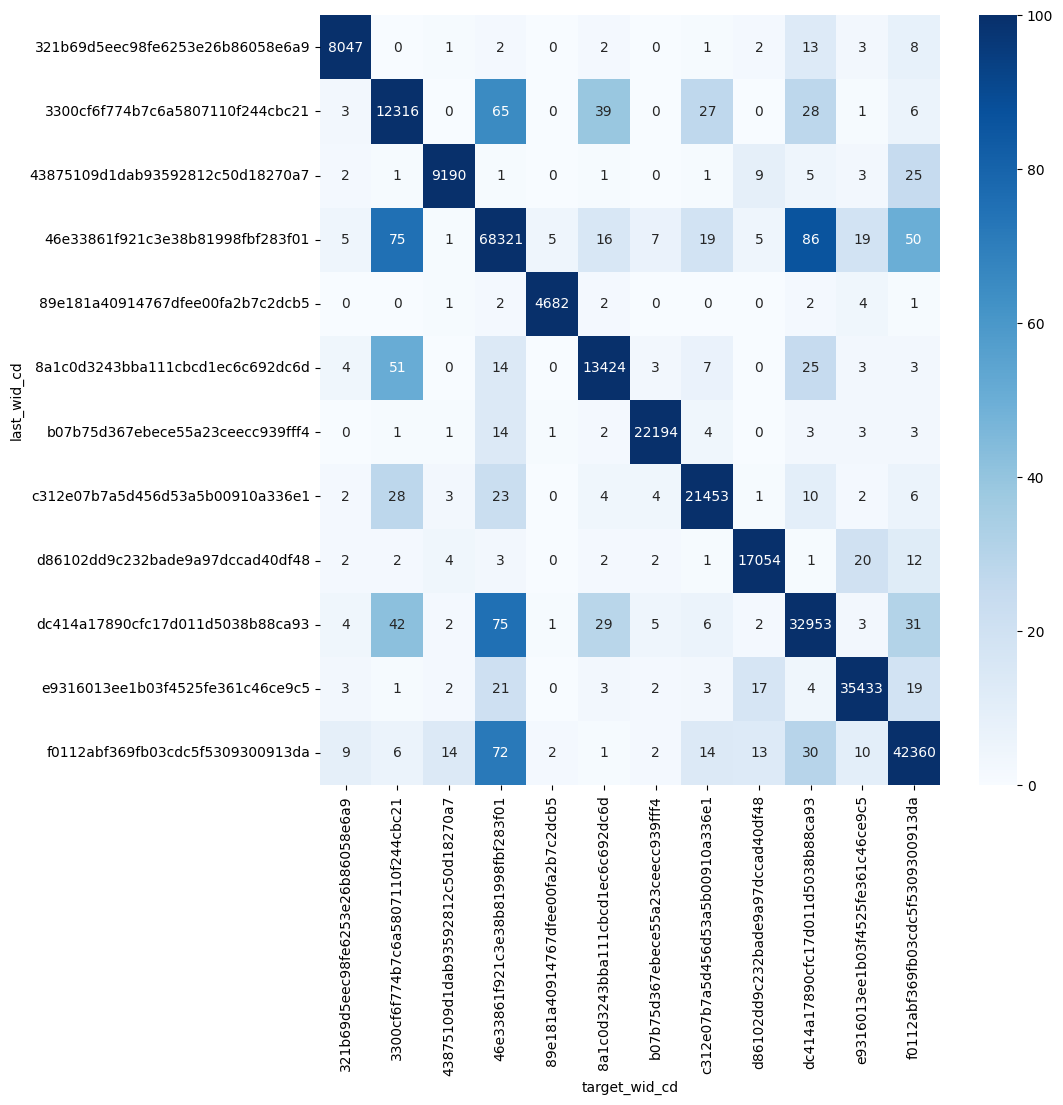

In [5]:
# ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆøNo„ÅØ, groupby Âæå„Å´ `last` „Çí‰Ωø„ÅÜ„Å®ÂèñÂæó„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô.
last_yado_df = train_log_df.groupby("session_id").last().reset_index()

# ÂÆø master „Å®Á¥ê„Å•„Åë„Å¶ wid_cd „Å™„Å©„ÇíÂèÇÁÖß„Åß„Åç„Çã„Çà„ÅÜ„Å´
last_yado_df = pd.merge(last_yado_df, yado_df, on="yad_no", how="left")

# Ê≠£Ëß£„É©„Éô„É´„Å´„Å§„ÅÑ„Å¶„ÇÇÂêåÊßò„Å´
target_yado_df = pd.merge(train_label_df, yado_df, on="yad_no", how="left")

# „Åü„Å®„Åà„Å∞ wid „Åå‰∏ÄÁ∑í„Åã„Å©„ÅÜ„Åã„ÇíË¶ã„Å¶„Åø„Åæ„Åô.
target_cd = "wid_cd"
_df = pd.concat([last_yado_df[[target_cd]].add_prefix("last_"), 
                 target_yado_df[[target_cd]].add_prefix("target_")], axis=1)
z = _df.groupby(_df.columns.tolist()).size().unstack().fillna(0).astype(int)

# heatmap „Å´„Åó„Å¶ÂèØË¶ñÂåñ„Çí„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z, ax=ax, cmap="Blues", annot=True, fmt=".0f", vmax=100)

In [6]:
# ÊúÄÂæå„ÅÆÂÆø„Å®‰∫àÁ¥Ñ„ÅÆÂÆø„Åå‰∏ÄÁ∑í„ÅÆÂâ≤Âêà„ÅØ, target_cd „ÅÆÂÄ§„Åå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã„É¨„Ç≥„Éº„Éâ„ÅÆÊØîÁéá„ÅßÂá∫„Åõ„Åæ„Åô„Å≠.
idx_same = last_yado_df[target_cd] == target_yado_df[target_cd]

print(f"{target_cd}„ÅåÂêå„ÅòÂâ≤Âêà: {idx_same.mean():.4f}")

wid_cd„ÅåÂêå„ÅòÂâ≤Âêà: 0.9956


„Åì„Çå„ÇíË¶ã„Çã„Å® 99.5% „ÅØÂêå‰∏Ä„ÅÆ wid „Åã„ÇâÈÅ∏„Å∞„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Å®„ÅÑ„ÅÜ„Åì„Å®„ÅØÂÄôË£úÈõÜÂêà„Å´ wid „ÅåÈÅï„ÅÜ„ÇÇ„ÅÆ„ÇíÂá∫„Åô„ÅÆ„ÅØÊÑèÂë≥„Åå„Å™„Åï„Åù„ÅÜ„Åß„Åô„Å≠„ÄÇ

„É´„Éº„É´„Éô„Éº„Çπ„Åß„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅÆÁµêÊûú„ÇíË¶ã„Å¶„Åø„Çã„Å®„ÄÅ„Åü„Å®„Åà„Å∞ @nasuka „Åï„Çì„ÅÆ„É´„Éº„É´„Éô„Éº„Çπ„Åß„ÅÆËß£Ê≥ï„Åß„ÅØ„ÄÅÂêå‰∏ÄÁúå„ÅÆ„Å™„Åã„Åß‰∫∫Ê∞ó„Å™„ÇÇ„ÅÆ„ÅßÁ©¥Âüã„ÇÅ„Çí„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åù„Åó„Å¶„Åì„ÅÆ„É´„Éº„É´„ÅÆ„Çπ„Ç≥„Ç¢„ÅØ 0.379 „Å®„Åù„Çå„Å™„Çä„Å´È´ò„ÅÑ„Åß„Åô„ÄÇ(ÂâçÂõû„ÅÆÂàùÂøÉËÄÖÂêë„ÅëË¨õÂ∫ß„ÅÆ„Çπ„Ç≥„Ç¢„ÅØ 0.15 „Åß„Åó„Åü‚Ä¶) „Åì„ÅÆÁµêÊûú„Åã„Çâ„ÇÇ„ÄÅ„É≠„Ç∞„Å´Âá∫Áèæ„Åô„ÇãÂÆø„Å®Ëøë„ÅÑÂ†¥ÊâÄ„Åã„Å§‰∫∫Ê∞ó„Å™ÂÆø„ÇíÂÄôË£ú„Å´„Åó„Å¶„ÄÅ„Åù„ÅÆ‰∏≠„Åß„É©„É≥„ÇØ„Çí‰ªò„Åë„Å¶‰∏ä„ÅÆ„ÇÇ„ÅÆ„Çí‰∫àÊ∏¨„Åô„Çã„Å®„ÅÑ„ÅÜ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåÊúâÂäπ„Åù„ÅÜ„Åß„ÅÇ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ

In [7]:

# ÂÆø„ÅÆÂá∫ÁèæÂõûÊï∞„ÇíË®àÁÆó
yad_count = train_log_df.groupby("yad_no").size().rename("yad_count").reset_index()

# ÂÆø„ÅÆ„Éû„Çπ„Çø„ÉºÊÉÖÂ†±„ÇíÁ¥ê„Å•„Åë„Å¶
_df = pd.merge(yad_count, yado_df, on="yad_no", how="left")

# Âá∫ÁèæÂõûÊï∞„ÅåÂ§ö„ÅÑÈ†Ü„Å´‰∏¶„Å≥Êõø„Åà
_df = _df.sort_values("yad_count", ascending=False)

# „Åì„ÅÆÁä∂ÊÖã„ÅßÁúåCD„Åî„Å®„Å´‰∏ä‰Ωç30‰ª∂„ÇíÂèñÂæó„Åô„Çã
ken_top_30 = _df.groupby("ken_cd").head(30)

# Êú¨ÂΩì„Å´30‰ª∂„Å´„Å™„Å£„Å¶„ÅÑ„Çã? ‚Üí „Å™„Å£„Å¶„Åù„ÅÜ
ken_top_30.groupby("ken_cd").size()

ken_cd
013592a15b9a689232792f11da797ac7    30
06a6febd7478c1aa664ed5ac87f2d560    30
072c85e1653e10c9c7dd065ad007125a    30
0745a2107686fcb724892ce52f19d02e    30
0a66f6ab9c0507059da6f22a0e1f1690    30
107c7305a74c8dcc4f143de208bf7ec2    30
21a8fca457386861964bea1ffa848fdd    30
223938a74a609968141867c244086206    30
2b99151dba9558109a35c75a3c05c38b    30
31a0f630d36db568ab23c9c1cd80d1c1    30
3831f43bb997a3028669c251c2c2f552    30
39c3eb151762dd35cf50e8bde404ae74    30
3acaaea4dab8892b5c9832f1b32f9448    30
3b09a7ce9934c00fd266f9cf246308d1    30
470fa9ac04f80c7e13db398668e124bf    30
517061b8165aa6370d9025951a64aa52    30
543ea7c443fdfd779bbd557f2ad99d80    30
558ac1909f0318b82c621ab250329d6d    30
572d60f0f5212aacda515ebf81fb0a3a    30
6692a692f80687411022c08e4f5a7a00    30
66c4d01ad8e30155582cf80b1d655986    30
689cf8289e7ea0b2eef1b017dcdfe8de    30
6920865be128aa14814810654738b159    30
6d279eafce12f1a118fe7cbaa74f105a    30
75617bb07a2785a948ab1958909211f1    30
7bc5fba93082f02f1c

In [8]:
# ÂÄãÂà•„Å´ `013592a15b9a689232792f11da797ac7` „ÇíË¶ã„Å¶„Åø„Å¶Á¢∫Ë™ç
ken_top_30[ken_top_30["ken_cd"] == "013592a15b9a689232792f11da797ac7"]

yad_no  yad_count  yad_type  total_room_cnt  wireless_lan_flg  \
5975     6164        214         0            64.0               1.0   
7407     7649        187         0           173.0               1.0   
1185     1227        183         0           233.0               1.0   
5171     5331        142         0           119.0               1.0   
10721   11077        128         0           183.0               1.0   
5882     6069        127         0           120.0               1.0   
4644     4785        125         0            31.0               1.0   
8366     8646        121         0             NaN               1.0   
7917     8173        118         0            47.0               1.0   
2452     2529        116         0            72.0               1.0   
4816     4962        100         0           119.0               1.0   
7813     8066         99         0           104.0               NaN   
9471     9782         93         0           153.0               1.0   
3895     4014         89         0           119.0               1.0   
6659     6874         87         0           212.0               1.0   
12805   13220         87         0             NaN               NaN   
7872     8127         78         0           112.0               1.0   
7578     7825         75         0           149.0               1.0   
3252     3358         74         0           120.0               1.0   
295       304         74         0            41.0               NaN   
10352   10696         73         0            37.0               1.0   
12409   12815         71         0            31.0               1.0   
870       899         68         0            51.0               1.0   
13272   13702         68         0           323.0               NaN   
2167     2232         67         0           176.0               1.0   
3686     3802         66         0           176.0               1.0   
2100     2164         65         0            60.0               1.0   
3975     4095         65         0           162.0               NaN   
5298     5461         65         0           125.0               1.0   
11962   12356         64         0            35.0               1.0   

       onsen_flg  kd_stn_5min  kd_bch_5min  kd_slp_5min  kd_conv_walk_5min  \
5975           1          NaN          NaN          NaN                NaN   
7407           1          NaN          NaN          NaN                1.0   
1185           1          1.0          NaN          NaN                1.0   
5171           0          NaN          NaN          NaN                1.0   
10721          1          NaN          NaN          NaN                NaN   
5882           1          NaN          NaN          NaN                1.0   
4644           1          NaN          NaN          NaN                1.0   
8366           1          NaN          NaN          NaN                NaN   
7917           1          NaN          NaN          NaN                NaN   
2452           1          NaN          NaN          NaN                1.0   
4816           0          1.0          NaN          NaN                1.0   
7813           1          NaN          NaN          NaN                1.0   
9471           0          1.0          NaN          NaN                NaN   
3895           0          1.0          NaN          NaN                1.0   
6659           0          1.0          NaN          NaN                1.0   
12805          0          1.0          NaN          NaN                1.0   
7872           0          NaN          NaN          NaN                NaN   
7578           1          NaN          NaN          1.0                NaN   
3252           0          1.0          NaN          NaN                1.0   
295            1          NaN          NaN          NaN                1.0   
10352          1          NaN          NaN          NaN                NaN   
12409          1          NaN          NaN          NaN   

„Åì„Çå„ÇíÁµÑ„ÅøËæº„Çì„Åß session-yad „ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí‰Ωú„Å£„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„Äú

In [9]:
# „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„Å´, yadoÊÉÖÂ†±„ÇíÁ¥ê‰ªò„Åë„Çã
session_last = pd.merge(train_log_df.groupby("session_id").last().reset_index(), 
                        yado_df, on="yad_no", how="left")

# Áúå„ÅÆ‰∏ä‰Ωç30„Åì„ÅÆÂÆø„Çí‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆøÊÉÖÂ†± `session_last` „Å´Á¥ê„Å•„Åë
out_df = pd.merge(session_last[["session_id", "ken_cd"]], 
         ken_top_30[["ken_cd", "yad_no"]], on="ken_cd", how="left")

# ‰Ωø„ÅÜ„ÅÆ„ÅØ„Çª„ÉÉ„Ç∑„Éß„É≥„Å®ÂÆø„ÅÆÈñ¢‰øÇ
out_df = out_df[["session_id", "yad_no"]].copy()

train_log_df „Åß„ÅÜ„Åæ„ÅèÂãï„Åè„Çà„ÅÜ„Å´„Åã„Åë„Åü„ÅÆ„Åß, „Åì„Çå„ÇíÈñ¢Êï∞Âåñ„Åó„Åæ„Åô„ÄÇ

In [10]:
def create_session_yad_df(input_df: pd.DataFrame):
    """input_df „Å´„ÅØ train_log / test_log „ÅÆ„ÅÑ„Åö„Çå„Åã„ÅåÊù•„Çã„Åì„Å®„ÇíÊÉ≥ÂÆö„Åó„Å¶„ÅÑ„Çã"""
    
    # „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„Å´, yadoÊÉÖÂ†±„ÇíÁ¥ê‰ªò„Åë„Çã
    session_last = pd.merge(input_df.groupby("session_id").last().reset_index(), 
                            yado_df, on="yad_no", how="left")

    # Áúå„ÅÆ‰∏ä‰Ωç30„Åì„ÅÆÂÆø„Çí‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆøÊÉÖÂ†± `session_last` „Å´Á¥ê„Å•„Åë
    out_df = pd.merge(session_last[["session_id", "ken_cd"]], 
             ken_top_30[["ken_cd", "yad_no"]], on="ken_cd", how="left")

    # ‰Ωø„ÅÜ„ÅÆ„ÅØ„Çª„ÉÉ„Ç∑„Éß„É≥„Å®ÂÆø„ÅÆÈñ¢‰øÇ
    out_df = out_df[["session_id", "yad_no"]].copy()
    
    # „É©„É≥„ÉÄ„É†„Å´‰ªò„ÅëÂä†„Åà„Åü„ÇÇ„ÅÆ‰ª•Â§ñ„ÉªÂêå‰∏Ä„É≠„Ç∞„Å´Âá∫Áèæ„Åô„ÇãÂÆø„ÇíÂÄôË£ú„Å´„ÅÑ„Çå„Çã
    out_df = pd.concat([out_df, input_df[["session_id", "yad_no"]]], ignore_index=True)
    
    # ÈáçË§á„ÅØÊÑèÂë≥„Åå„Å™„ÅÑ„ÅÆ„ÅßÊ∂à„Åó„Åæ„Åô„ÄÇ
    out_df = out_df.drop_duplicates()
    
    # Ë¶ã„ÅüÁõÆ„ÇíÊèÉ„Åà„Çã„Åü„ÇÅ„Å´ session / yad „ÅÆÈ†ÜÁï™„Åß„ÇΩ„Éº„Éà„Çí„Åó„Åæ„Åô
    out_df = out_df.sort_values(["session_id", "yad_no"]).reset_index(drop=True)
    
    return out_df 

In [11]:
with Timer(prefix="train session yado..."):
    train_session_yad_df = create_session_yad_df(input_df=train_log_df)

# ‰∫àÊ∏¨„ÅÆÈöõ„Å´„ÅØ session „Åî„Å®„Å´ yado „Å´ÂØæ„Åó„Å¶„ÅÆ‰∫àÁ¥ÑÁ¢∫Áéá„ÇíÂá∫„Åï„Å™„Åè„Å¶„ÅØ„Å™„Çä„Åæ„Åõ„Çì„Åã„Çâ„ÄÅÂêå„Åò„Çà„ÅÜ„Å´ session - yado „ÅÆÁµÑ„Çí‰Ωú„Çä„Åæ„Åô„ÄÇ
# „Åü„Å†„ÅóÂ≠¶ÁøíÊôÇ„Å®Âêå„Åò„Çà„ÅÜ„Å™ÁµÑ„ÅßËâØ„ÅÑ„Åã? „ÅØË≠∞Ë´ñ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì. („Åì„Åì„Å´Áèæ„Çå„Å™„ÅÑÂÆø„ÅØ‰∫àÊ∏¨ÂØæË±°„Å´Áµ∂ÂØæÂÖ•„Çâ„Å™„ÅÑ„Åü„ÇÅ)
with Timer(prefix="test session yado..."):
    test_session_yad_df = create_session_yad_df(input_df=test_log_df)

train session yado... 5.337[s]
test session yado... 2.512[s]


‰ªäÂõû„ÅØÂçòÁ¥î„Å´Áúå„ÅåÂêå„Åò„ÇÇ„ÅÆ„ÄÅ„ÇíÂÄôË£ú„Å´ËøΩÂä†„Åó„Åæ„Åó„Åü„ÄÇ„Åì„Çå‰ª•Â§ñ„Å´„ÇÇËâ≤„ÄÖ„Å®ËâØ„ÅÑÂÄôË£ú„ÅÆ‰Ωú„ÇäÊñπ„ÅØËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÅÆ„Åß„Åú„Å≤„Ç™„É™„Ç∏„Éä„É´„ÅÆÂ∑•Â§´„Çí„Åó„Å¶„Åø„Å¶„Åè„Å†„Åï„ÅÑ!

> ‰æã„Åà„Å∞ @zakopuro „Åï„Çì„ÅÆ [Lightgbm ReRank Model BaseLine(LB:0.4158)](https://www.guruguru.science/competitions/22/discussions/20c54ca7-a389-43b0-9028-92011fb52fd5/) „ÅÆ„Çà„ÅÜ„Å´„Çà„ÇäÂáù„Å£„ÅüÂÄôË£ú„Çí‰Ωú„Å£„Å¶Á¥ê„Å•„Åë„ÇãÊñπÊ≥ï„ÅåÊèêÊ°à„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

### note: ÂÄôË£ú„ÅÆ„ÇØ„Ç™„É™„ÉÜ„Ç£„ÇíËÄÉ„Åà„Çã

‰ªäÂõû„ÅØÂêå‰∏Ä„ÅÆÁúåCD„Åß‰∫∫Ê∞ó30‰ª∂„ÅÆÂÆø„ÇíÂÄôË£ú„Å®„Åó„Å¶Êé°Áî®„Åó„Åæ„Åó„Åü„Åå„ÄÅ„Åì„ÅÆÂÄôË£ú„ÅØ„Åü„Åè„Åï„ÇìËÄÉ„Åà„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ„Åù„Çå„Çâ„ÅÆËâØ„Åï („ÇØ„Ç™„É™„ÉÜ„Ç£) „ÇíÊ∏¨„Çå„Çã„Å®Êñ∞„Åó„ÅÑ„Ç¢„Ç§„Éá„Ç£„Ç¢„ÅåËâØ„ÅÑ„ÅãÊÇ™„ÅÑ„Åã„ÇíÂà§Êñ≠„Åß„Åç„Å¶Â¨â„Åó„ÅÑ„Åß„Åô„Å≠„ÄÇ

„Åù„ÅÆ‰∏Ä„Å§„Å®„Åó„Å¶„ÄÅÂÄôË£ú„ÅÆ‰∏≠„Å´„Å©„ÅÆ„Åê„Çâ„ÅÑÊ≠£Ëß£„ÅÆÂÆø„ÅåÂÖ•„Å£„Å¶„ÅÑ„Çã„Åã„Å®„ÅÑ„ÅÜ„ÇÇ„ÅÆ„Åå„ÅÇ„Çã„Åß„Åó„Çá„ÅÜ„ÄÇ

> @column2131 „Åï„Çì„ÅÆ discussion [CV vs LB](https://www.guruguru.science/competitions/22/discussions/5156955c-34b0-454f-a4c5-565e62d16b98/) „Åß„ÅØ„Éí„ÉÉ„ÉàÁéá„Å®„ÅÑ„ÅÜË®Ä„ÅÑÊñπ„Çí„Åï„Çå„Å¶„ÅÑ„Åæ„Åó„Åü„ÄÇ

In [12]:
_df = pd.merge(train_session_yad_df[["session_id"]], 
               train_label_df, on="session_id", how="left")
has_truth_yado = (train_session_yad_df["yad_no"] == _df["yad_no"]).groupby(train_session_yad_df["session_id"]).sum()

In [13]:
has_truth_yado.mean()

0.5109110558438229

### Â≠¶ÁøíÁî®„Éá„Éº„Çø„Å∏„ÅÆÂæåÂá¶ÁêÜ

‰ªäÂõû„ÅØ„ÅÇ„Åà„Å¶ train label „Çí‰ªò‰∏é„Åó„Å¶„ÅÑ„Åæ„Åõ„Çì„ÄÇ„Åì„Çå„ÅØÂ≠¶ÁøíÊôÇ„ÅÆ„Éê„Ç§„Ç¢„Çπ„ÇíÂèñ„ÇäÈô§„Åè„Åì„Å®„ÅåÁãô„ÅÑ„ÅÆ‰∏Ä„Å§„Åß„Åô„ÄÇ(ÂæåËø∞)

In [14]:
# Ê≠£Ëß£„É©„Éô„É´ train_label_df „ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí‰ªò‰∏é
_df = pd.concat([train_session_yad_df], ignore_index=True)

# ÈáçË§á„ÇíÂâäÈô§„Åó„Å¶
_df = _df.drop_duplicates().reset_index(drop=True)

# Ê≠£Ëß£„É©„Éô„É´„Å´Âê´„Åæ„Çå„Å¶„ÅÑ„Çã„É¨„Ç≥„Éº„Éâ„ÅÆ index „ÇíÈÖçÂàó„ÅßÂèñÂæó„Åó„Å¶
target_index = pd.merge(_df.reset_index(), train_label_df, on=["session_id", "yad_no"], how="inner")["index"].values

# Ê≠£Ëß£Index„Å´Âê´„Åæ„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà 1 / „Åù„ÅÜ„Åß„Å™„ÅÑ„Å® 0 „ÅÆ„É©„Éô„É´„Çí‰ΩúÊàê
_df["target"] = _df.index.isin(target_index).astype(int)

# Ë¶ã„ÅüÁõÆ„ÇíÊèÉ„Åà„Çã„Åü„ÇÅ„Å´ session / yad „Åß„ÇΩ„Éº„Éà„Åó„Å¶„Åä„Åè
_df = _df.sort_values(["session_id", "yad_no"]).reset_index(drop=True)

train_session_yad_df = _df.copy()

<Axes: xlabel='yad_no'>

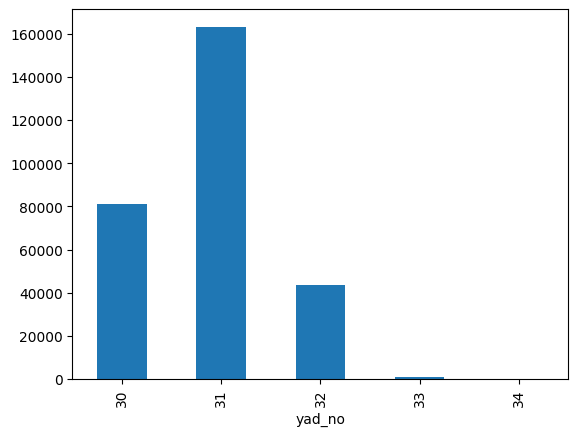

In [15]:
train_session_yad_df.groupby("session_id")["yad_no"].nunique().value_counts().sort_index().plot(kind="bar")

### „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å∏„ÅÆÂæåÂá¶ÁêÜ: „É≠„Ç∞„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÂâäÈô§

„ÉÜ„Çπ„ÉàÁî®„Éá„Éº„Çø„ÅØÊúÄÁµÇÁöÑ„Å´„Äå„Åì„ÅÆÂÆø„Å´Ê≥ä„Åæ„Å£„Å¶„Çã?„Äç„Çí‰∫àÊ∏¨„Åô„ÇãÂØæË±°„Å´„Å™„ÇãÂÆø„ÇíÂÆöÁæ©„Åô„Çã„Åì„Å®„Å´„Å™„Çä„Åæ„Åô„ÄÇ‰ªäÂõû„ÅÆ„Éá„Éº„Çø„ÅØ„Äå„É≠„Ç∞„Éá„Éº„Çø„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅØÂøÖ„ÅöÊ≠£Ëß£„É©„Éô„É´„Åß„ÅØ„Å™„ÅÑ„Äç„Å®„ÅÑ„ÅÜÂà∂Á¥ÑÊù°‰ª∂„Åå„ÅÇ„Çã„ÅÆ„Åß„ÄÅ„Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆÊúÄÂæå„ÅÆÂÆø„ÅØÂèñ„ÇäÂéª„ÇãÂá¶ÁêÜ„ÇíË°å„Å£„Å¶„Åä„Åç„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [16]:
def remove_last_yad_id(session_yad_df):
    
    # „Çª„ÉÉ„Ç∑„Éß„É≥‰∏≠‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÁµÑ„Çí‰ΩúÊàê
    last_yad_df = whole_log_df.groupby("session_id").tail(1)[["session_id", "yad_no"]]
    
    # ÊúÄÂæå„Åß„ÅÇ„Çã„Åì„Å®„Åå„Çè„Åã„Çã„Çà„ÅÜ„Å´„É©„Éô„É´ is_last „Çí‰ªò‰∏é
    last_yad_df["is_last"] = 1
    
    # ÂºïÊï∞„ÅÆ session - yad „ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Å®„Éû„Éº„Ç∏„Åó„Å¶
    merged = session_yad_df.merge(last_yad_df, on=["session_id", "yad_no"], how="left")
    
    # is_last **„Åß„ÅØ„Å™„ÅÑ** (i.e. is_last is null) „Éá„Éº„Çø„ÅÆ„Åø„Å´Áµû„Çã
    idx_use = merged["is_last"].isnull()
    out_df = session_yad_df[idx_use].reset_index(drop=True)
    
    return out_df

test_session_yad_df = remove_last_yad_id(test_session_yad_df)

<Axes: xlabel='yad_no'>

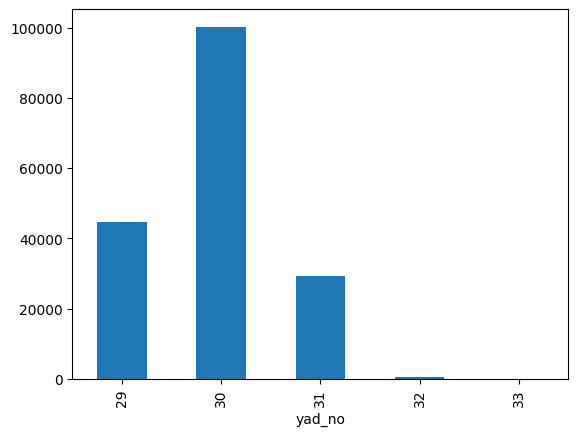

In [17]:
test_session_yad_df.groupby("session_id")["yad_no"].nunique().value_counts().sort_index().plot(kind="bar")

## ÁâπÂæ¥Èáè„ÅÆ‰ΩúÊàê

In [18]:
# ======= 1:„Çª„ÉÉ„Ç∑„Éß„É≥„ÅåÊåÅ„Å§ÊÉÖÂ†± -- „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆÈï∑„ÅïÊÉÖÂ†± =======
session_length = whole_log_df.groupby("session_id")["seq_no"].max()

def create_session_length_feature(input_df: pd.DataFrame):
    session_length = whole_log_df.groupby("session_id")["seq_no"].max().rename("session_length")
    
    out_df = pd.merge(input_df["session_id"], session_length, on="session_id", how="left").drop(columns=["session_id"])
    return out_df

# 2ÂõûÂêå„ÅòÈñ¢Êï∞„Çí‰Ωø„Å£„Å¶ÁâπÂæ¥„Çí‰Ωú„Å£„Åü„Å®„ÅçÂêå‰∏Ä„ÅÆ„Éá„Éº„Çø„Åå„Åß„Åç„Çã„Åã? „Çí„ÉÜ„Çπ„Éà„Åó„Å¶„Åä„Åè„Å®Â∞ë„ÅóÂÆâÂøÉ„Åß„Åô
assert create_session_length_feature(train_session_yad_df).equals(create_session_length_feature(train_session_yad_df))

# ======= 2:ÂÆø„ÅÆÊÉÖÂ†± -- Êï∞ÂÄ§Á≥ªÁâπÂæ¥ =======
def create_yado_numaric_feature(input_df: pd.DataFrame):
    num_columns = [
        'yad_type',
        'total_room_cnt',
        'wireless_lan_flg',
        'onsen_flg',
        'kd_stn_5min',
        'kd_bch_5min',
        'kd_slp_5min',
        'kd_conv_walk_5min',
    ]
    
    # key „Å®„Å™„Çã `yad_no` „Çí‰ªò‰∏é„Åô„Çã„ÅÆ„Çí„ÅäÂøò„Çå„Å™„Åè.
    out_df = pd.merge(input_df["yad_no"], yado_df[["yad_no", *num_columns]], how="left").drop(columns=["yad_no"])
    return out_df

assert create_yado_numaric_feature(train_session_yad_df).equals(create_yado_numaric_feature(train_session_yad_df))


# ======= 3: ÂÆø„ÅÆÊÉÖÂ†± -- wid cd „ÅÆ label encoding =======
# LabelEncoding „ÅØ scikit-learn „Å´Â§âÊèõ„É≠„Ç∏„ÉÉ„ÇØ„ÅåÁî®ÊÑè„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÅÆ„Åß„Åù„Çå„ÇíÂà©Áî®„Åô„Çã„ÅÆ„Åå‰æøÂà©„Åß„Åô„ÄÇ
from sklearn.preprocessing import LabelEncoder

# ‰Ωø„ÅÑÊñπ„ÅØ„Ç∑„É≥„Éó„É´„Åß, LabelEncoder „ÇíÂÆöÁæ©„Åó„Åü„ÅÇ„Å® fit_trainsform „Åß‰∏é„Åà„Çâ„Çå„ÅüÈÖçÂàó„ÇíÊï∞ÂÄ§ Label „Å´Â§âÊèõ„Åó„Åæ„Åô„ÄÇ
le = LabelEncoder()

wid_cd_label = le.fit_transform(yado_df["wid_cd"])
wid_cd_label

def create_yad_wid_cd_feature(input_df: pd.DataFrame):
    source_df = pd.DataFrame({
        "yad_no": yado_df["yad_no"],
        "wid_cd_label": wid_cd_label
    })
    
    out_df = pd.merge(input_df["yad_no"], source_df, how="left").drop(columns=["yad_no"])
    return out_df

assert create_yad_wid_cd_feature(train_session_yad_df).equals(create_yad_wid_cd_feature(train_session_yad_df))

## „Çà„ÇäÂáù„Å£„ÅüÁâπÂæ¥„ÇíËÄÉ„Åà„Çã

### ÂÆø„Å®„Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅÆÁâπÂæ¥Èáè: „Åì„ÅÆÂÆø„É≠„Ç∞„Å´„ÅÇ„Çã??

ÂâçÂõû„ÅØÂÆø„ÇÑ„Çª„ÉÉ„Ç∑„Éß„É≥„ÅåÂçò‰Ωì„ÅßÊåÅ„Å§ÁâπÂæ¥„ÇíËÄÉ„Åà„Åæ„Åó„Åü„ÄÇ„Çà„ÇäÁô∫Â±ïÁöÑ„Å™ÊÉÖÂ†±Èáè„Å®„Åó„Å¶„ÄÅ„Åì„Çå„ÇíÂêåÊôÇ„Å´ËÄÉ„Åà„ÅüÊÉÖÂ†±„ÇÇÁâπÂæ¥Èáè„Å®„Åó„Å¶Âä†„Åà„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ‰æã„Åà„Å∞„Åß„Åô„Åå„Äå„Åì„ÅÆ„Çª„ÉÉ„Ç∑„Éß„É≥ÂÜÖ„ÅÆ„É≠„Ç∞„Å´„Åì„ÅÆÂÆøNo„ÅØÂÖ•„Å£„Å¶„ÅÑ„Çã„Åã?„Äç„Å™„Å©„ÅåË©≤ÂΩì„Åó„Åæ„Åô„ÄÇ‰ªä‰∫àÊ∏¨„Åó„Çà„ÅÜ„Å®„Åó„Å¶„ÅÑ„ÇãÂÆø„Åå„Çª„ÉÉ„Ç∑„Éß„É≥„Å´ÂÖ•„Å£„Å¶„ÅÑ„Çã„Å®„Åù„Çå„ÅØ‰∫àÁ¥ÑÁéá„Åå‰∏ä„Åå„Çä„Åù„ÅÜ„Åß„Åô„Å≠„ÄÇ

In [19]:
train_session_yad_df.head()

session_id  yad_no  target
0  000007603d533d30453cc45d0f3d119f    1050       0
1  000007603d533d30453cc45d0f3d119f    1070       0
2  000007603d533d30453cc45d0f3d119f    1679       0
3  000007603d533d30453cc45d0f3d119f    2395       0
4  000007603d533d30453cc45d0f3d119f    2424       0

In [20]:
def create_is_in_log_feature(input_df):
    # ÊåÅ„Å£„Å¶„ÅÑ„Çã„É≠„Ç∞„Éá„Éº„ÇøÂÖ®‰Ωì„Å´ÂÖ•„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Å´ `is_in_log` „Å®„ÅÑ„ÅÜ„Éï„É©„Ç∞„Çí‰ªò‰∏é
    _df = whole_log_df[["session_id", "yad_no"]].copy().drop_duplicates().reset_index(drop=True)
    _df["is_in_log"] = 1
    
    # ÂÖ•Âäõ„Åï„Çå„Åü session - yado „Å®Á¥ê„Å•„Åë„Çã. 
    # „É≠„Ç∞„Å´„Å™„ÅÑÂ†¥Âêà„Å´„ÅØ `is_in_log` „ÅØÊ¨†Êêç (Nan) „Åô„Çã„ÅÆ„Åß 0 „ÅßÁ©¥Âüã„ÇÅ„Åó„Å¶ 0-1 „ÅÆ„Éï„É©„Ç∞„Å´„Åô„Çã
    out_df = pd.merge(input_df, _df, on=["session_id", "yad_no"], how="left")[["is_in_log"]].fillna(0)
    
    return out_df

In [21]:
create_is_in_log_feature(train_session_yad_df).head()

is_in_log
0        0.0
1        0.0
2        0.0
3        1.0
4        0.0

In [22]:
create_is_in_log_feature(train_session_yad_df).mean()

is_in_log    0.044664
dtype: float64

ÂÆøNo„Å†„Å®„ÄÅ„Åü„Åæ„Åü„Åæ„Åù„ÅÆÂÆø„ÇíË¶ã„Å¶„ÅÑ„Å™„ÅÑ„Å®‰∏ÄËá¥„Åó„Å™„ÅÑ„ÅÆ„Åß„Å°„Çá„Å£„Å®Âé≥„Åó„ÅÑÊù°‰ª∂„Åã„ÇÇ„Åó„Çå„Å™„ÅÑ„Åß„Åô„Å≠„ÄÇ

discussion „ÇíË¶ã„Å¶„ÅÑ„Çã„Å®, Âêå„ÅòÂú∞Âüü„ÅßÂÆø„ÇíÊé¢„Åó„Å¶„ÅÑ„Çã„Çª„ÉÉ„Ç∑„Éß„É≥„ÅåÂ§ö„Åù„ÅÜ„Å®„ÅÑ„ÅÜ„Åì„Å®„Åå„Çè„Åã„Å£„Å¶„ÅÑ„Åæ„Åô„Åã„Çâ„ÄÅ‰æã„Åà„Å∞„ÄåÂØæË±°„ÅÆÂÆø„Å®Âêå„ÅòÂú∞Âüü„ÇíË¶ã„Å¶„Çã„Åã?„Äç„ÇíÁâπÂæ¥„Å´„Åô„Çã„Å®Âêå„ÅòÂú∞Âüü„Åã„Å©„ÅÜ„Åã„ÄÅ„Çí„É¢„Éá„É´„ÅåÂà§Êñ≠„Åß„Åç„Å¶ËâØ„ÅÑ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

In [23]:
# --- ÂÆüË£Ö„ÅÆ„Çπ„Ç±„ÉÉ„ÉÅ ---

# 0: Âú∞Âüü„ÅÆ„Ç´„É©„É†Âêç„ÇíÊåáÂÆö(„ÅÇ„Å®„Åß„Åπ„Å§„ÅÆÂàó„Åß„ÇÇ„Åß„Åç„Çã„Çà„ÅÜ„Å´!)
region_column = "sml_cd"

# 1: „Çª„ÉÉ„Ç∑„Éß„É≥ÂÆø„Å´Âú∞Âüü„ÇíÁ¥ê„Å•„Åë
session_yad_region_df = pd.merge(train_session_yad_df, yado_df[["yad_no", region_column]], on="yad_no", how="left")

# 2: „É≠„Ç∞„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶, „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆ„É¨„Ç≥„Éº„Éâ„Å´Âú∞Âüü„ÇíÁ¥ê„Å•„Åë
#   - „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆË°å„ÅÆ„Åø„ÇíÂèñ„ÇäÂá∫„Åó„Å¶
last_session_yad_df = whole_log_df.groupby("session_id")["yad_no"].last().reset_index()

#   - ÂÆø„Éû„Çπ„Çø„Éº„Åã„ÇâÂú∞Âüü„ÇíÁ¥ê„Å•„Åë
last_session_yad_df = pd.merge(last_session_yad_df, yado_df[["yad_no", region_column]], on="yad_no", how="left")

# 3: „Çª„ÉÉ„Ç∑„Éß„É≥ÂÆø„ÅÆ„Çª„ÉÉ„Ç∑„Éß„É≥„Å´, ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÂú∞Âüü„ÇíÁ¥ê„Å•„Åë
last_yad_region = pd.merge(session_yad_region_df["session_id"], 
                           last_session_yad_df[["session_id", region_column]], 
                           how="left")[region_column]

# 4: 1 „Å® 3 „ÅÆÂú∞Âüü„Åå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã == ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÂú∞Âüü„Å®ÂÄôË£ú„ÅÆÂÆø„ÅÆÂú∞Âüü„Åå‰∏ÄÁ∑í!
session_yad_region_df[region_column] == last_yad_region

0          False
1          False
2          False
3           True
4          False
           ...  
8914267    False
8914268    False
8914269    False
8914270    False
8914271    False
Name: sml_cd, Length: 8914272, dtype: bool

In [24]:
def create_option_yad_and_last_yado_is_same_region_feature(input_df):

    # 0: Âú∞Âüü„ÅÆ„Ç´„É©„É†Âêç„ÇíÊåáÂÆö(„ÅÇ„Å®„Åß„Åπ„Å§„ÅÆÂàó„Åß„ÇÇ„Åß„Åç„Çã„Çà„ÅÜ„Å´!)
    region_column = "sml_cd"

    # 1: „Çª„ÉÉ„Ç∑„Éß„É≥ÂÆø„Å´Âú∞Âüü„ÇíÁ¥ê„Å•„Åë
    session_yad_region_df = pd.merge(input_df, 
                                     yado_df[["yad_no", region_column]], on="yad_no", how="left")

    # 2: „É≠„Ç∞„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶, „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆ„É¨„Ç≥„Éº„Éâ„Å´Âú∞Âüü„ÇíÁ¥ê„Å•„Åë
    #   - „Çª„ÉÉ„Ç∑„Éß„É≥„ÅÆ‰∏ÄÁï™ÊúÄÂæå„ÅÆË°å„ÅÆ„Åø„ÇíÂèñ„ÇäÂá∫„Åó„Å¶
    last_session_yad_df = whole_log_df.groupby("session_id")["yad_no"].last().reset_index()

    #   - ÂÆø„Éû„Çπ„Çø„Éº„Åã„ÇâÂú∞Âüü„ÇíÁ¥ê„Å•„Åë
    last_session_yad_df = pd.merge(last_session_yad_df, yado_df[["yad_no", region_column]], on="yad_no", how="left")

    # 3: „Çª„ÉÉ„Ç∑„Éß„É≥ÂÆø„ÅÆ„Çª„ÉÉ„Ç∑„Éß„É≥„Å´, ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÂú∞Âüü„ÇíÁ¥ê„Å•„Åë
    last_yad_region = pd.merge(session_yad_region_df["session_id"], 
                               last_session_yad_df[["session_id", region_column]], 
                               how="left")[region_column]

    # 4: 1 „Å® 3 „ÅÆÂú∞Âüü„Åå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã == ‰∏ÄÁï™ÊúÄÂæå„ÅÆÂÆø„ÅÆÂú∞Âüü„Å®ÂÄôË£ú„ÅÆÂÆø„ÅÆÂú∞Âüü„Åå‰∏ÄÁ∑í!
    idx = session_yad_region_df[region_column] == last_yad_region
    
    out_df = pd.DataFrame({
        "same": idx.astype(int)
    }).add_prefix(f"{region_column}_is_")
    
    return out_df

In [25]:
assert create_option_yad_and_last_yado_is_same_region_feature(test_session_yad_df)\
    .equals(create_option_yad_and_last_yado_is_same_region_feature(test_session_yad_df))

### ÂÖ®ÈÉ®„ÅÆÊÉÖÂ†±„ÅØ‰Ωø„ÅÜ„Åû: ÁîªÂÉè„ÅÆÁâπÂæ¥„Çí‰Ωø„ÅÜ

> ÂÄã‰∫∫ÁöÑ„Å´„ÄÅÁîªÂÉè„ÅÆembedding„Éá„Éº„Çø„Çí‰Ωø„Å£„Åü„É¢„Éá„É´„ÅÆÊßãÁØâÊñπÊ≥ï„ÇíÁü•„Çä„Åü„ÅÑ„Åß„Åô‚Ä¶

ÂâçÂõû„ÅØÂÆåÂÖ®„Å´„Çπ„Ç≠„ÉÉ„Éó„Åó„Å¶„ÅÑ„Åæ„Åó„Åü„Åå„ÄÅ‰∏é„Åà„Çâ„Çå„ÅüÊÉÖÂ†±„ÅÆ‰∏≠„Å´„ÅØÁîªÂÉè„ÅÆ embedding ÊÉÖÂ†±„ÇÇ„ÅÇ„Çä„Åæ„Åô„ÄÇ‰Ωø„Çè„Å™„ÅÑ„ÅÆ„ÅØ„ÇÇ„Å£„Åü„ÅÑ„Å™„ÅÑ„Åß„Åô„Å≠„ÄÇ

In [26]:
image_df.head()

yad_no  category     emb_0     emb_1     emb_2     emb_3     emb_4  \
0       1  exterior -0.010736 -0.055452 -0.034968  0.052371  0.013423   
1       1  exterior  0.056188 -0.026121 -0.056543  0.022742 -0.046260   
2       1  exterior  0.059149  0.007443 -0.050527  0.031444 -0.034918   
3       1  facility -0.008016  0.031106 -0.013940  0.013397 -0.025822   
4       1  facility  0.010669 -0.000045  0.002484  0.008006 -0.041051   

      emb_5     emb_6     emb_7  ...   emb_502   emb_503   emb_504   emb_505  \
0  0.037117  0.098775  0.074732  ... -0.039645  0.047950 -0.001786 -0.054268   
1  0.020954  0.006757 -0.010403  ... -0.001135  0.019452 -0.158739  0.069106   
2  0.018043  0.016075 -0.000287  ... -0.017606  0.028306 -0.153259  0.079555   
3  0.020344  0.049135 -0.031101  ... -0.029366 -0.035536 -0.098193  0.031702   
4  0.022130  0.026998  0.011513  ... -0.008329 -0.025674 -0.175958  0.052703   

    emb_506   emb_507   emb_508   emb_509   emb_510   emb_511  
0 -0.173725 -0.037862 -0.039419  0.039463 -0.071842 -0.007374  
1 -0.314221 -0.014093  0.020678  0.058678  0.027612 -0.007790  
2 -0.305520 -0.034372  0.037976  0.065278  0.023551 -0.006770  
3 -0.359215 -0.041691  0.002394 -0.022892 -0.039722 -0.013380  
4 -0.350555 -0.035050 -0.029618  0.010537 -0.040529 -0.031906  

[5 rows x 514 columns]

<Axes: xlabel='category'>

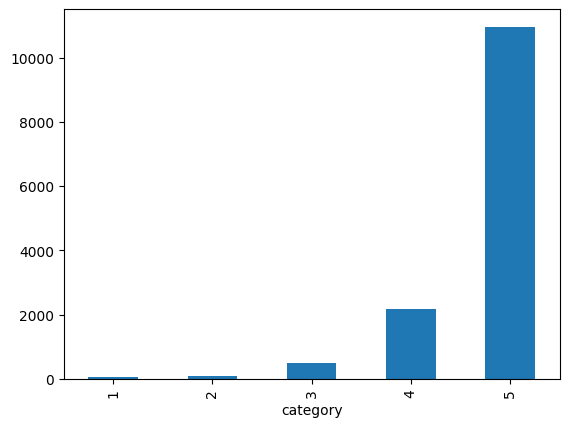

In [27]:
image_df.groupby("yad_no")["category"].nunique().sort_values().value_counts().sort_index().plot(kind="bar")

ÁîªÂÉè„ÅØ‰∏Ä„Å§„ÅÆÂÆø„Å´ÂØæ„Åó„Å¶Ë§áÊï∞Á¥ê„Å•„ÅÑ„Å¶„ÅÑ„Çã„ÅÆ„Åß„ÄÅ‰Ωï„Çâ„ÅãÈõÜÁ¥Ñ„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ„ÇÅ„Å°„ÇÉ„Åè„Å°„ÇÉ„Ç∑„É≥„Éó„É´„Å´„ÇÑ„Çã„Å™„Çâ min / max „Å™„Å©„ÅÆÈõÜÁ¥ÑÈñ¢Êï∞„ÇíÈÄö„Åô„ÇÑ„ÇäÊñπ„Åå„ÅÇ„Çã„Åß„Åó„Çá„ÅÜ. 

In [28]:
emb_columns = [s for s in image_df.columns.tolist() if "emb" in s]
image_df.groupby("yad_no")[emb_columns].min()

emb_0     emb_1     emb_2     emb_3     emb_4     emb_5     emb_6  \
yad_no                                                                         
1      -0.037200 -0.057255 -0.056543 -0.028323 -0.101417 -0.040709 -0.033629   
2      -0.038669 -0.030190 -0.035665 -0.064840 -0.080834 -0.054236 -0.042528   
3      -0.023177 -0.039656 -0.028291 -0.019827 -0.098171 -0.030859 -0.034548   
4      -0.068744 -0.047429 -0.067256 -0.041668 -0.082009 -0.045475 -0.042378   
5      -0.097115 -0.010818 -0.057803 -0.036588 -0.118123 -0.077922 -0.012545   
...          ...       ...       ...       ...       ...       ...       ...   
13802  -0.031192 -0.040603 -0.065945 -0.035399 -0.056453 -0.044835 -0.008783   
13803  -0.024467 -0.057539 -0.038662  0.005614 -0.092965 -0.030548 -0.033675   
13804  -0.026491 -0.037895 -0.026476 -0.029740 -0.086030 -0.080269 -0.048862   
13805  -0.039996 -0.046716 -0.060858 -0.055050 -0.052728 -0.027112 -0.005738   
13806  -0.041561 -0.033403 -0.050167 -0.020485 -0.103952 -0.036673 -0.035740   

           emb_7     emb_8     emb_9  ...   emb_502   emb_503   emb_504  \
yad_no                                ...                                 
1      -0.032371 -0.026507 -0.069944  ... -0.039645 -0.035536 -0.175958   
2      -0.052566 -0.060701 -0.040175  ... -0.047399 -0.060039 -0.150361   
3      -0.077161 -0.057538 -0.037286  ... -0.047663 -0.046045 -0.138281   
4      -0.051579 -0.044365 -0.039852  ... -0.027083 -0.027925 -0.164499   
5      -0.033398 -0.149741 -0.077266  ... -0.036381 -0.056794 -0.116022   
...          ...       ...       ...  ...       ...       ...       ...   
13802  -0.036229 -0.116063 -0.064191  ... -0.017953 -0.058666 -0.144928   
13803  -0.062009 -0.070334 -0.060690  ... -0.021311 -0.050022 -0.122312   
13804  -0.042981 -0.085097 -0.090111  ... -0.054214 -0.031470 -0.139748   
13805  -0.025017 -0.106183 -0.034920  ... -0.014945 -0.083782 -0.153668   
13806  -0.036364 -0.102065 -0.036527  ... -0.026683 -0.045084 -0.137052   

         emb_505   emb_506   emb_507   emb_508   emb_509   emb_510   emb_511  
yad_no                                                                        
1      -0.061051 -0.359215 -0.047629 -0.039601 -0.047809 -0.071842 -0.043084  
2      -0.077267 -0.347712 -0.070468 -0.059483 -0.088799 -0.017178 -0.072243  
3      -0.087606 -0.406311 -0.068986 -0.038933 -0.058962 -0.026506 -0.036826  
4      -0.103130 -0.386344 -0.057975 -0.023044 -0.065556 -0.153507 -0.039060  
5      -0.097249 -0.355593 -0.081870 -0.043299 -0.096033 -0.036269 -0.055251  
...          ...       ...       ...       ...       ...       ...       ...  
13802  -0.128571 -0.375489 -0.076609 -0.043291 -0.054533 -0.036349 -0.046314  
13803  -0.031142 -0.406309 -0.076503 -0.053203 -0.042033 -0.024968 -0.049659  
13804  -0.061569 -0.384251 -0.064341 -0.036068 -0.076327 -0.014744 -0.026141  
13805  -0.025393 -0.381890 -0.056510 -0.059967 -0.030812 -0.040316 -0.036467  
13806  -0.081918 -0.354786 -0.073014 -0.044150 -0.053934 -0.020876 -0.042835  

[13804 rows x 512 columns]

„Åì„Çå„Çí session - yado „ÅÆ yado_no „Åß join „Åô„Çã„Å®‰ªä‰∫àÊ∏¨ÂØæË±°„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÂÆø„ÅÆÁîªÂÉè„ÄÅ„Å®„ÅÑ„ÅÜÁâπÂæ¥Èáè„Å®„Åó„Å¶Âà©Áî®„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ„Åü„Å† 512 Ê¨°ÂÖÉ„ÅØ„Å°„Çá„Å£„Å®Â§ß„Åç„Åô„Åé„Çã„Åç„Çâ„ÅÑ„Åå„ÅÇ„Çä„Åæ„Åô„ÅÆ„Åß„ÄÅÊ¨°ÂÖÉÂúßÁ∏Æ„ÅÆÊâãÊ≥ï„Åß„Çà„Çä„ÇÆ„É•„ÉÉ„Å®ÂúßÁ∏Æ„Åó„ÅüÊÉÖÂ†±„Çí‰Ωø„ÅÑ„Åæ„Åô„ÄÇ

> note: LightGBM „Å™„Å©„ÅÆ GBDT Á≥ª„É¢„Éá„É´„ÅØÁâπÂæ¥„ÅåÂ¢ó„Åà„Å¶„ÇÇ„Åù„Çå„Å™„Çä„Å´„ÅØÂãï„Åè„ÅÆ„Åß„Åô„Åå„ÄÅ„ÅÇ„Åæ„ÇäÊÑèÂë≥„Åå„Å™„ÅÑÊÉÖÂ†±„ÅåÂ¢ó„Åà„Çã„Å®Ë®àÁÆóÊôÇÈñì„Å∞„Åã„Çä„Åã„Åã„Å£„Å¶„Åó„Åæ„ÅÑ„ÄÅË©¶Ë°åÂõûÊï∞„ÅÆ„Ç§„ÉÜ„É¨„Éº„Ç∑„Éß„É≥„ÅåÂõû„Åõ„Å™„Åè„Å™„Å£„Å¶„Åó„Åæ„ÅÑ„Åæ„Åô„ÄÇ„Åù„ÅÆ„Åü„ÇÅÁîªÂÉè„ÅÆ embedding „Å™„Å©Ê¨°ÂÖÉÊï∞„ÅåÂ§ö„ÅÑ„ÇÇ„ÅÆ„ÅØÊ¨°ÂÖÉÂúßÁ∏Æ„Åó„Å¶Âà©Áî®„Åô„Çã„Åì„Å®„ÅåÂ§ö„ÅÑ„Åß„Åô„ÄÇ

Ê¨°ÂÖÉÂúßÁ∏Æ„Å´„ÅØ„ÄÅ„Çà„Åè‰Ωø„Çè„Çå„Çã TruncatedSVD „ÇíÂà©Áî®„Åó„Åæ„Åô

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
# ‰ªäÂõû„ÅØ 32 Ê¨°ÂÖÉ„Å´„Åô„Çã„Åì„Å®„Å´„Åó„Åæ„Åó„Åü
img_svd = TruncatedSVD(n_components=32)

# ‰Ωø„ÅÑÊñπ„ÅØÁ∞°Âçò„Åß, shape = (n_data, n_features,) „ÅÆ numpy ÈÖçÂàó„ÇíÊ∏°„Åõ„Å∞OK„Åß„Åô
z = img_svd.fit_transform(image_df[emb_columns].values)

# ‰ªäÂõû„ÅØ 32 Ê¨°ÂÖÉ„ÇíÊåáÂÆö„Åó„Åü„ÅÆ„Åß z „ÅØ (n_data, 32,) Ê¨°ÂÖÉ„ÅÆÈÖçÂàó„Å´„Å™„Çä„Åæ„Åô
# 512 ‚Üí 32 Ê¨°ÂÖÉ„Å´ÂúßÁ∏Æ„Åå„Åß„Åç„Åæ„Åó„Åü!
z.shape

(178406, 32)

In [31]:
# session - yado „Å®Á¥ê‰ªò„Åë„Çã„Å®„Åç„ÅØ‰∏ÄÂ∫¶‰ª£Ë°®ÂÄ§„Å´„Çà„ÇãÈõÜÁ¥Ñ„Çí„Åó„Å¶ yado „Åî„Å®„ÅÆÁâπÂæ¥„Å´Â§âÊèõ„Åó„Åæ„Åô (‰ªäÂõû„ÅØ max)
svd_img_df = pd.DataFrame(data=z)
max_svd_df = svd_img_df.groupby(image_df["yad_no"]).max()

# „Åù„ÅÆÂæå yad_no „Åß left join!
pd.merge(train_session_yad_df["yad_no"], max_svd_df, on="yad_no", how="left").drop(columns=["yad_no"])

0         1         2         3         4         5         6   \
0        0.799066  0.249712  0.395857  0.313937  0.112595  0.006046  0.197873   
1        0.849753  0.329471  0.542548  0.296774  0.318526  0.277339  0.291379   
2        0.807748  0.406683  0.204416  0.438942  0.250365  0.073701  0.206542   
3        0.812981  0.390100  0.533999  0.276252  0.253336  0.349934  0.254345   
4        0.819419  0.374829  0.534119  0.223044  0.225264  0.194689  0.247435   
...           ...       ...       ...       ...       ...       ...       ...   
8914267  0.819830  0.353886  0.526891  0.266508  0.118968  0.130372  0.222803   
8914268  0.747481  0.366037  0.466706  0.331662 -0.008991  0.150856  0.187767   
8914269  0.777625  0.414778  0.012371  0.254349  0.199607  0.103958  0.212018   
8914270  0.801645  0.413744  0.287878  0.257530  0.291503  0.198703  0.312904   
8914271  0.692694  0.208996  0.183378  0.271822 -0.021917 -0.011270  0.046152   

               7         8         9   ...        22        23        24  \
0        0.195366  0.235127  0.209570  ...  0.111942  0.050131  0.093560   
1        0.256612  0.265943  0.175351  ...  0.074207  0.091206  0.040322   
2        0.246098  0.155415 -0.008906  ...  0.166619  0.063714  0.093777   
3        0.195943  0.232721  0.138602  ...  0.068325  0.170550  0.108252   
4        0.174660  0.249353  0.199332  ...  0.107459  0.146584  0.123821   
...           ...       ...       ...  ...       ...       ...       ...   
8914267  0.220199  0.253947  0.150557  ...  0.097056  0.197258  0.092411   
8914268  0.162762  0.140937  0.135638  ...  0.085990  0.136493  0.101624   
8914269  0.242371  0.323040  0.010099  ...  0.310314  0.114712  0.138916   
8914270  0.180335  0.191182  0.144889  ...  0.150009  0.093181  0.065397   
8914271  0.080184  0.142193 -0.002759  ...  0.134862  0.126487 -0.011869   

               25        26        27        28        29        30        31  
0        0.077831  0.099657  0.095322  0.024953  0.142729  0.118042 -0.023132  
1        0.059427  0.094778  0.042522  0.133434  0.073480  0.028499  0.073925  
2        0.063698  0.079841  0.094801  0.077623  0.102796  0.075264  0.042146  
3        0.058885  0.114107  0.058284  0.153064  0.138687  0.048498  0.239100  
4        0.076322  0.081588  0.086636  0.040906  0.129129  0.117809  0.048562  
...           ...       ...       ...       ...       ...       ...       ...  
8914267  0.174443  0.082188  0.030860  0.115796  0.080049  0.056061  0.111266  
8914268  0.062341  0.120436  0.134391  0.125763  0.138687  0.065469  0.239100  
8914269  0.040272  0.113280  0.114700  0.106473  0.069679  0.091478  0.033198  
8914270  0.087076  0.104474  0.111663  0.166024  0.037516  0.083568  0.066188  
8914271  0.110509 -0.033842  0.139329  0.081871  0.019656 -0.021699 -0.048681  

[8914272 rows x 32 columns]

‰∏äË®ò„Åß‰Ωú„Å£„Åü `max_svd_df` „Åå„ÅÇ„Çå„Å∞„ÅÇ„Å®„ÅØ yad_no „Å® join „Çí„Åô„Çã„Å†„Åë„Å™„ÅÆ„Åß„Ç∑„É≥„Éó„É´„Åß„Åô„ÄÇ

In [32]:
def create_yado_image_feature(input_df):
    out_df = pd.merge(input_df["yad_no"], 
                      max_svd_df, 
                      on="yad_no", how="left").drop(columns=["yad_no"])
    
    return out_df.add_prefix("yad_img_max_")

### Future Work

* ‰ªäÂõû„ÅØ max „ÅßÈõÜÁ¥Ñ„Çí„Åó„Åæ„Åó„Åü„Åå‰ªñ„ÅÆÈõÜÁ¥ÑÊñπÊ≥ï„ÇÇ„ÅÇ„Çã„Åã„ÇÇ?„Åó„Çå„Åæ„Åõ„Çì
* ÈõÜÁ¥Ñ„Åô„Çã‰ª•Â§ñ„Åß„ÇÇÁîªÂÉè„ÅÆÊÉÖÂ†±„Çí‰Ωø„ÅÜÊñπÊ≥ï„ÅØ„ÅÇ„Çä„Åù„ÅÜ„Åß„Åô„ÄÇ‰æã„Åà„Å∞ÂçòÁ¥î„Å´ÁîªÂÉè„ÅÆ‰ª∂Êï∞„Å™„Å©„ÇÇÊÑèÂë≥„Åå„ÅÇ„Çä„Åù„ÅÜ„Åß„Åô„Å≠ („Åü„Åè„Åï„ÇìÁîªÂÉè„ÇíÁî®ÊÑè„Åó„Å¶„ÅÑ„Çã == „Åò„ÇÉ„Çâ„Çì„ÅÆÊé≤Ëºâ„Å´„ÇÑ„ÇãÊ∞ó„Åå„ÅÇ„ÇãÂÆø„Åã„ÇÇ?)

### ÁâπÂæ¥Èáè„ÅÆ„Éû„Éº„Ç∏

‰∏äË®ò„ÅÆÁâπÂæ¥Èáè‰ΩúÊàêÈñ¢Êï∞„ÇíÈÄ£Á∂öÁöÑ„Å´Âëº„Å≥Âá∫„Åó & ÁµêÂêà„Åó„Å¶„ÄÅÂ≠¶Áøí„Å´‰Ωø„ÅÜÁâπÂæ¥ÈáèÂÖ®‰Ωì„Å´„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [33]:
# „ÅÑ„Åæ„Åæ„Åß„ÅÆÈñ¢Êï∞„Çí„Åô„Åπ„Å¶„Åå„Å£„Å°„ÇÉ„Çì„Åì„Åó„Å¶ÁâπÂæ¥Èáè„Çí‰ΩúÊàê„Åô„ÇãÈñ¢Êï∞„ÇíÂÆöÁæ©„Åó„Åæ„Åó„Çá„ÅÜ!

def create_feature(input_df):

    # functions „Å´ÁâπÂæ¥Èáè‰ΩúÊàêÈñ¢Êï∞„ÇíÈÖçÂàó„ÅßÂÆöÁæ©„Åó„Åæ„Åó„Åü.
    # „Å©„ÅÆÈñ¢Êï∞„ÇÇÂêå„Åò input / output „ÅÆ„Ç§„É≥„Çø„Éº„Éï„Çß„Ç§„Çπ„Å™„ÅÆ„Åß for „ÅßÂõû„Åõ„Å¶Â¨â„Åó„ÅÑ„Åß„Åô„Å≠ ;)
    functions = [
        create_session_length_feature,
        create_yado_numaric_feature,
        create_yad_wid_cd_feature,
        create_is_in_log_feature,
        create_yado_image_feature,
        create_option_yad_and_last_yado_is_same_region_feature,
    ]

    out_df = pd.DataFrame()
    for func in functions:
        func_name = str(func.__name__)
        with Timer(prefix=f"- create {func_name}"):
            _df = func(input_df)
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [34]:
# ÂÆüË°å„Åó„Å¶ train / test Áî®„ÅÆÁâπÂæ¥Èáè„Çí‰Ωú„Çä„Åæ„Åô.

with Timer(prefix="train..."):
    train_feat_df = create_feature(train_session_yad_df)

with Timer(prefix="test..."):
    test_feat_df = create_feature(test_session_yad_df)

X = train_feat_df.values
y = train_session_yad_df["target"].values

- create create_session_length_feature 0.921[s]
- create create_yado_numaric_feature 0.717[s]
- create create_yad_wid_cd_feature 0.417[s]
- create create_is_in_log_feature 2.041[s]
- create create_yado_image_feature 2.378[s]
- create create_option_yad_and_last_yado_is_same_region_feature 1.704[s]
train... 9.336[s]
- create create_session_length_feature 0.636[s]
- create create_yado_numaric_feature 0.372[s]
- create create_yad_wid_cd_feature 0.214[s]
- create create_is_in_log_feature 1.010[s]
- create create_yado_image_feature 1.504[s]
- create create_option_yad_and_last_yado_is_same_region_feature 1.136[s]
test... 5.570[s]


## „É¢„Éá„É´„ÅÆÂ≠¶Áøí

In [35]:
from sklearn.model_selection import GroupKFold

fold = GroupKFold(n_splits=5)
cv = fold.split(X, y, groups=train_session_yad_df["session_id"].values)
cv = list(cv) # split „ÅÆËøî„ÇäÂÄ§„ÅØ generator „Å™„ÅÆ„Åß list Âåñ„Åó„Å¶‰ΩïÂ∫¶„ÇÇ iterate „Åß„Åç„Çã„Çà„ÅÜ„Å´„Åó„Å¶„Åä„Åè

import lightgbm as lgbm
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, f1_score, mean_absolute_error, mean_squared_error, \
    r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score, cohen_kappa_score, \
    average_precision_score, precision_score, recall_score


def binary_metrics(y_true: np.ndarray,
                   predict_probability: np.ndarray,
                   threshold=.5) -> dict:
    """
    calculate binary task metrics
    Args:
        y_true:
            target. shape = (n_data,)
        predict_probability:
            predict value. be probability prediction for log_loss, roc_auc, etc.
        threshold:
            Thresholds for calculating the metrics that need to be evaluated as labels
    Returns:
        metrics metrics dictionary. the key is metric name, and the value is score.
    """
    predict_label = np.where(predict_probability > threshold, 1, 0)
    none_prob_functions = [
        accuracy_score,
        f1_score,
        precision_score,
        recall_score
    ]

    prob_functions = [
        roc_auc_score,
        log_loss,
        average_precision_score
    ]

    scores = {}
    for f in none_prob_functions:
        score = f(y_true, predict_label)
        scores[str(f.__name__)] = score
    for f in prob_functions:
        score = f(y_true, predict_probability)
        scores[f.__name__] = score

    return scores

def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None):
    """lightGBM „Çí CrossValidation „ÅÆÊû†ÁµÑ„Åø„ÅßÂ≠¶Áøí„ÇíË°å„Å™„ÅÜ function"""

    # „Éë„É©„É°„Éº„Çø„Åå„Å™„ÅÑ„Å®„Åç„ÅØ„ÄÅÁ©∫„ÅÆ dict „ÅßÁΩÆ„ÅçÊèõ„Åà„Çã
    if params is None:
        params = {}

    models = []
    n_records = len(X)
    # training data „ÅÆ target „Å®Âêå„Åò„Å†„Åë„ÅÆ„Çº„É≠ÈÖçÂàó„ÇíÁî®ÊÑè
    oof_pred = np.zeros((n_records, ), dtype=np.float32)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        print(f"-- start fold {i}")
        # „Åì„ÅÆÈÉ®ÂàÜ„Åå‰∫§Â∑ÆÊ§úË®º„ÅÆ„Å®„Åì„Çç„Åß„Åô„ÄÇ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí cv instance „Å´„Çà„Å£„Å¶ÂàÜÂâ≤„Åó„Åæ„Åô
        # training data „Çí trian/valid „Å´ÂàÜÂâ≤
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMClassifier(**params, verbose=0)

        with Timer(prefix="fit fold={} ".format(i)):

            # cv ÂÜÖ„Åß train „Å´ÂÆöÁæ©„Åï„Çå„Åü x_train „ÅßÂ≠¶Áøí„Åô„Çã
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    callbacks=[
                        lgbm.early_stopping(stopping_rounds=50, verbose=True),
                        lgbm.log_evaluation(period=50, ),
                    ],)

        # cv ÂÜÖ„Åß validation data „Å®„Åï„Çå„Åü x_valid „Åß‰∫àÊ∏¨„Çí„Åó„Å¶ oof_pred „Å´‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè
        # oof_pred „ÅØÂÖ®ÈÉ®Â≠¶Áøí„Å´‰Ωø„Çè„Å™„Åã„Å£„Åü„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÁµêÊûú„Å´„Å™„Çã ‚Üí „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÊÄßËÉΩ„ÇíË¶ã„ÇãÊåáÊ®ô„Å®„Åó„Å¶Âà©Áî®„Åß„Åç„Çã
        pred_i = clf.predict_proba(x_valid)[:, 1]
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        score = binary_metrics(y_valid, pred_i)
        print(f" - fold{i + 1} - {score}")

    score = binary_metrics(y, oof_pred)

    print("=" * 50)
    print(f"FINISHI: Whole Score: {score}")
    return oof_pred, models

In [36]:
params = {
    # ÁõÆÁöÑÈñ¢Êï∞. „Åì„Çå„ÅÆÊÑèÂë≥„ÅßÊúÄÂ∞è„Å®„Å™„Çã„Çà„ÅÜ„Å™„Éë„É©„É°„Éº„Çø„ÇíÊé¢„Åó„Åæ„Åô. 
    "objective": "binary", 

    # Êú®„ÅÆÊúÄÂ§ßÊï∞
    "n_estimators": 10000, 

     # Â≠¶ÁøíÁéá. Â∞è„Åï„ÅÑ„Åª„Å©„Å™„ÇÅ„Çâ„Åã„Å™Ê±∫ÂÆöÂ¢ÉÁïå„Åå‰Ωú„Çâ„Çå„Å¶ÊÄßËÉΩÂêë‰∏ä„Å´Áπã„Åå„ÇãÂ†¥Âêà„ÅåÂ§ö„ÅÑ„Åß„Åô„ÄÅ
    "learning_rate": .1,

    # ÁâπÂæ¥ÈáçË¶ÅÂ∫¶Ë®àÁÆó„ÅÆ„É≠„Ç∏„ÉÉ„ÇØ(ÂæåËø∞)
    "importance_type": "gain", 
    "random_state": 510,
}

oof, models = fit_lgbm(X, y=y, params=params, cv=cv)

-- start fold 0
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.0496182
[100]	valid_0's binary_logloss: 0.0493541
[150]	valid_0's binary_logloss: 0.0492133
[200]	valid_0's binary_logloss: 0.0491364
[250]	valid_0's binary_logloss: 0.0491046
[300]	valid_0's binary_logloss: 0.0490845
[350]	valid_0's binary_logloss: 0.0490782
[400]	valid_0's binary_logloss: 0.0490548
[450]	valid_0's binary_logloss: 0.0490548
Early stopping, best iteration is:
[424]	valid_0's binary_logloss: 0.0490526
fit fold=0  66.798[s]
 - fold1 - {'accuracy_score': 0.9844298721644211, 'f1_score': 0.18716875054903223, 'precision_score': 0.6813046258793434, 'recall_score': 0.10848608282416837, 'roc_auc_score': 0.9318435215893102, 'log_loss': 0.049052625044479096, 'average_precision_score': 0.3949551159996933}
-- start fold 1
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.0497136
[100]	valid_0's binary_logloss: 0.049472
[150]	valid

## ÁµêÊûú„ÇíËß£Èáà„Åô„Çã

„É¢„Éá„É´„Åå„Åß„Åç„Åü! Ê¨°„ÅØ‰∫àÊ∏¨„Å†! „ÅÆÂâç„Å´‚Ä¶ ‰∏ÄÂ∫¶‰∫àÊ∏¨ÁµêÊûú„ÅÆË¶ãÁ©ç„ÇÇ„Çä„ÇíË°å„ÅÑ„Åæ„Åó„Çá„ÅÜ„ÄÇ

### ÊâãÂÖÉ„Åß„Çπ„Ç≥„Ç¢„ÇíË¶ãÁ©ç„ÇÇ„Çã

‰∫àÊ∏¨ÊôÇ„Å´„ÅØ 5 Fold „Å´ÂàÜ„Åë„Å¶„É¢„Éá„É´„Çí‰Ωú„Çä„Åæ„Åó„Åü„ÅÆ„Åß `oof` „Å´Âê´„Åæ„Çå„Çã„Éá„Éº„Çø„ÅØÂÆåÂÖ®„Å´Ê≠£Ëß£ÊÉÖÂ†±„ÇíÁü•„Çâ„Å™„ÅÑÁä∂ÊÖã„Åß‰∫àÊ∏¨„Åï„Çå„ÅüÁ¢∫Áéá„Å´„Å™„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åì„Çå„Çí‰Ωø„Å£„Å¶‰ªäÂõû„ÅÆÊåáÊ®ô MAP@10 „ÅÆ„Çπ„Ç≥„Ç¢„ÇíË¶ãÁ©ç„ÇÇ„Å£„Å¶Ë¶ã„Åæ„Åó„Çá„ÅÜ„ÄÇ

„Åæ„Åö„ÅØ‰∫àÊ∏¨Á¢∫Áéá„Å®„ÇÇ„Å®„ÅÆ„Çª„ÉÉ„Ç∑„Éß„É≥„ÉªÂÆøÊÉÖÂ†±„Åã„Çâ„ÄÅ„Çª„ÉÉ„Ç∑„Éß„É≥„Åî„Å®„Å´‰∫àÊ∏¨Á¢∫Áéá„ÅÆÈ´ò„ÅÑÂÆøNo„Çí10‰ª∂ÂèñÂæó„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇ„Åì„Çå„ÅØ„ÅÇ„Å®„Åß„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÇÇÂêå„Åò„Åì„Å®„Çí„Åó„Åæ„Åô„ÅÆ„Åß„ÄÅÈñ¢Êï∞„Å´„Åó„Å¶„Åä„Åè„Å®‰æøÂà©„Åß„Åô„Å≠„ÄÇ

In [37]:
def create_top_10_yad_predict(predict, session_yad_df):
    _df = pd.concat([session_yad_df[["session_id", "yad_no"]], pd.Series(predict, name="predict")], axis=1)
    
    # „Çª„ÉÉ„Ç∑„Éß„É≥„Åî„Å®„Å´‰∫àÊ∏¨Á¢∫Áéá„ÅÆÈ´ò„ÅÑÈ†Ü„Å´ yad_no „ÅÆÈÖçÂàó„Çí‰ΩúÊàê
    _agg = _df.sort_values("predict", ascending=False).groupby("session_id")["yad_no"].apply(list)
    
    out_df = pd.DataFrame(index=_agg.index, data=_agg.values.tolist()).iloc[:, :10]
    
    return out_df

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k for a single actual value.

    Parameters:
    actual : int
        The actual value that is to be predicted
    predicted : list
        A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns:
    float
        The average precision at k
    """
    if actual in predicted[:k]:
        return 1.0 / (predicted[:k].index(actual) + 1)
    return 0.0

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k for lists of actual values and predicted values.

    Parameters:
    actual : list
        A list of actual values that are to be predicted
    predicted : list
        A list of lists of predicted elements (order does matter in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns:
    float
        The mean average precision at k
    """
    return sum(apk(a, p, k) for a, p in zip(actual, predicted)) / len(actual)

In [38]:
oof_label_df = create_top_10_yad_predict(predict=oof, session_yad_df=train_session_yad_df)

# „ÅÑ„Åæ‰ΩúÊàê„Åó„Åü session_id „Å®Âêå„Åò‰∏¶„Å≥„Åß train_label „Çí‰∏¶„Å≥Êõø„Åà
train_label = train_label_df.set_index("session_id").loc[oof_label_df.index]["yad_no"].values

# MAPK (k=10) „Å®„Åó„Å¶Ë®àÁÆó
oof_score = mapk(actual=train_label, predicted=oof_label_df.values.tolist(), k=10)

print(f"OOF Score: {oof_score:.4f}")

OOF Score: 0.2794


Â≠¶ÁøíÊôÇ„ÅÆË¶ãÁ©ç„ÇÇ„Çä„Å®„Åó„Å¶ÊÄßËÉΩ„ÅØ `0.2796` „Å®„Å™„Çä„Åæ„Åó„Åü„ÄÇ

ÂâçÂõû„Å®ÊØî„Åπ„Çã„Å®„Å†„ÅÑ„Å∂ÁèæÂÆüÁöÑ„Å™ÂÄ§„Åß„Åô„Å≠! (ÂâçÂõû„ÅØ 0.4 „ÇíË∂Ö„Åà„Åü„Å®„Å¶„ÇÇÈ´ò„ÅÑ„Çπ„Ç≥„Ç¢„Åß„ÅÇ„Å£„Åü„Åì„Å®„ÇíÊÄù„ÅÑÂá∫„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ)

ÂâçÂõûÂ∞ë„Åó„ÅäË©±„Åó„ÅüÂ≠¶ÁøíÊôÇ„ÅÆ„Éê„Ç§„Ç¢„ÇπÂïèÈ°å„ÅåÈñ¢‰∏é„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ‰ªäÂõû„ÅÆ notebook „Åß„ÅØ train label „ÅÆ session-yado „ÇíÂä†„Åà„Çã„ÄÅ„Å®„ÅÑ„ÅÜ„ÄåÊ≠£Ëß£„ÇíÁü•„Å£„Å¶„ÅÑ„Å™„ÅÑ„Å®„Åß„Åç„Å™„ÅÑ„ÄçÊìç‰Ωú„Çí„Åó„Å™„Åã„Å£„Åü„Åü„ÇÅ„ÄÅÂ≠¶ÁøíÊôÇ„ÅÆÊû†ÁµÑ„Åø„Åß„ÉÜ„Çπ„Éà„ÅÆ„Å®„Åç„ÅÆ„Çà„ÅÜ„Å™Âãï„Åç„ÅåÂÜçÁèæ„Åß„Åç„Å¶„ÅÑ„Çã„Åì„Å®„ÅåË¶ÅÂõ†„ÅÆ‰∏Ä„Å§„Åß„Åô„ÄÇ

### ÁâπÂæ¥ÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñ

/tmp/ipykernel_170118/1168668338.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=feature_importance_df,


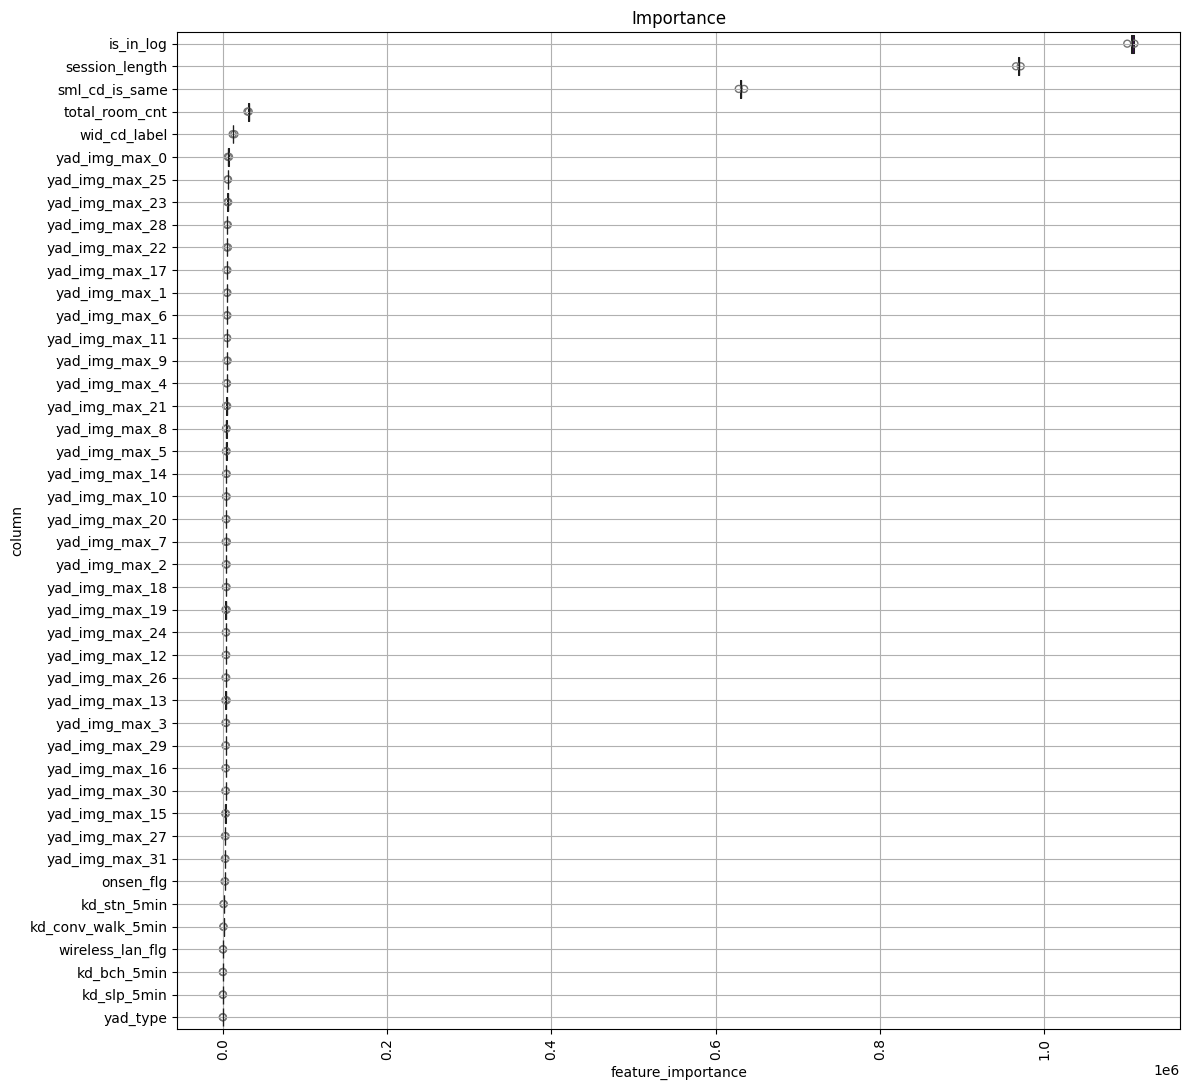

In [39]:
def visualize_importance(models, feat_train_df):
    """lightGBM „ÅÆ model ÈÖçÂàó„ÅÆ feature importance „Çí plot „Åô„Çã
    CV„Åî„Å®„ÅÆ„Éñ„É¨„Çí boxen plot „Å®„Åó„Å¶Ë°®Áèæ„Åó„Åæ„Åô.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            Â≠¶ÁøíÊôÇ„Å´‰Ωø„Å£„Åü DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importances_
        _df["column"] = feat_train_df.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby("column")\
        .sum()[["feature_importance"]]\
        .sort_values("feature_importance", ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(12, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x="feature_importance", 
                  y="column", 
                  order=order, 
                  ax=ax, 
                  palette="viridis", 
                  orient="h")
    ax.tick_params(axis="x", rotation=90)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax

fig, ax = visualize_importance(models, train_feat_df)

## Êé®Ë´ñ„Åô„Çã

Â≠¶Áøí„Åó„Åü„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÅÆ‰∫àÊ∏¨„ÇíË°å„ÅÑ„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [40]:
# k ÂÄã„ÅÆ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨Á¢∫Áéá (predict_proba) „Çí‰ΩúÊàê. shape = (5, N_test,).
pred_prob = np.array([model.predict_proba(test_feat_df.values)[:, 1] for model in models])

In [41]:
# k ÂÄã„ÅÆ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÂÄ§„ÅÆÂπ≥Âùá shape = (N_test,).
pred_prob = np.mean(pred_prob, axis=0) # axis=0 „Å™„ÅÆ„Åß shape „ÅÆ `k` „ÅåÊΩ∞„Çå„Çã 

### ‰∫àÊ∏¨ÂÄ§„ÅÆÁ¢∫Ë™ç

‰∫àÊ∏¨ÁµêÊûú„ÅåÂ≠¶ÁøíÊôÇ„ÅÆÁµêÊûú„Å®Â∑Æ„ÅåÂá∫„Å¶„ÅÑ„Å™„ÅÑ„Åã„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇÂÖ∑‰ΩìÁöÑ„Å´„ÅØ out of fold „ÅÆ‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂàÜÂ∏É„Å® test „Å∏„ÅÆ‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂàÜÂ∏É„ÇíË¶ã„Å¶Â§ß„Åç„Å™„Ç∫„É¨„Åå„Å™„ÅÑ„Åã„Å™„Å©„ÇíË¶ã„Çã„Å®ËâØ„ÅÑ„Åß„Åô„ÄÇ„Åì„ÅÆ„Å®„Åç‰∫àÊúü„Åõ„Å¨„Ç∫„É¨„ÅåÁô∫Áîü„Åó„Å¶„ÅÑ„ÇãÂ†¥Âêà„Å´„ÅØÂÆüË£Ö„ÅåÈñìÈÅï„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÇÑ„ÄÅ„ÉÜ„Çπ„ÉàÊôÇ„Å´‰Ωø„Åà„Å™„ÅÑÊÉÖÂ†±„ÇíÂ≠¶ÁøíÊôÇ„Å´‰Ωø„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà„Å™„Å©„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

Âã¢„ÅÑËâØ„Åè submit „Çí„Åô„ÇãÂâç„Å´‰∏ÄÂ∫¶Á¢∫Ë™ç„Åó„Å¶„Åä„Åè„Å®ËâØ„ÅÑ„Åß„Åôü´ë( '-' ü´ë)

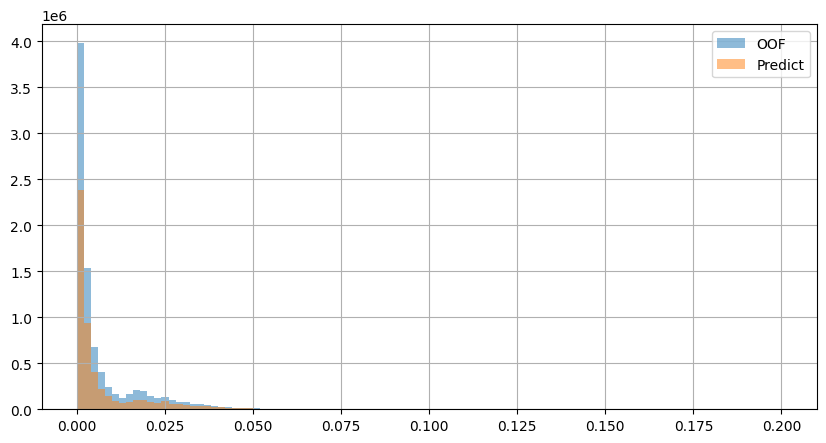

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
bins = np.linspace(0, 0.2, 101)

ax.hist(oof, bins=bins, alpha=.5, label="OOF")
ax.hist(pred_prob, bins=bins, alpha=.5, label="Predict")

ax.legend()
ax.grid()

In [43]:
test_pred_df = create_top_10_yad_predict(predict=pred_prob, session_yad_df=test_session_yad_df)
test_pred_df.iloc[:, :10].fillna(0).astype(int).add_prefix("predict_")\
    .to_csv(os.path.join("../#2_submission.csv"), index=False)

In [44]:
test_pred_df.head()

0      1      2      3     4      5  \
session_id                                                                  
00001149e9c73985425197104712478c   3560    385  12785    755   109  13292   
0000e02747d749a52b7736dfa751e258  10095  12707      3  13131  1229   7169   
0000f17ae2628237d78d3a38b009d3be    757   9190     28   2758   850  13027   
000174a6f7a569b84c5575760d2e9664  12341   5657   2795    277  6991   2047   
00017e2a527901c9c41b1acef525d016   5713   6576  12524  13590  9020   3187   

                                      6     7     8      9  
session_id                                                  
00001149e9c73985425197104712478c  10883  5066  1169  10418  
0000e02747d749a52b7736dfa751e258   1091  2974  7093  11919  
0000f17ae2628237d78d3a38b009d3be   9015  7345  4882   1558  
000174a6f7a569b84c5575760d2e9664   3359  4180  9319   2363  
00017e2a527901c9c41b1acef525d016   5106  6703  1364   7474